<a href="https://colab.research.google.com/github/ThePingPing/Torch_Model_Colab/blob/main/CustomDataModel_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo
!pip install tqdm

The libs for differente type of Dataset in Torch

1) For Vision --> torch.vision.datasets

2) For Text --> torchtext.datasets

3) For Audio --> torchaudio.datasets

4) For Recommendatoin system --> torchrec.datasets

5) Bonus --> TorchData*  

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from torchinfo import summary
from torch.optim import Adam, SGD
from torchvision import datasets
from torchvision.datasets import ImageFolder

import torchvision.transforms as Tr

from torch.utils.data import Dataset, DataLoader, TensorDataset

import numpy as np
import pandas as pd
import random
from tqdm.auto import tqdm

import PIL
from PIL import Image


from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import time
import requests
import zipfile
import os
from pathlib import Path


import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# This model it's to classify Food Steaks, Pizza, Sushi

our dataset is a subset of Food101 dataset

he have 101 different classes of food and 1000 images per classe (train_set = 750 , test_set = 250 )

In [ ]:
## initialize Constantes

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# n_samples = 1000
# numbers_epochs = 300
# name = "Circel Model"
# noise = 0.03
# rand_state = 42 ## like random seed

In [ ]:
def download_data():

  if image_path.is_dir():
    print(f"{image_path}, directory already exists... skip skip the downloading")
  else:
    print(f"{image_path} does not exist , creating one")
    image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path /  "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading the pizza , steak, sushi Dataset ..")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza , steak and sushi dataset")
    zip_ref.extractall(image_path)


In [ ]:
download_data()

data/pizza_steak_sushi does not exist , creating one
Unzipping pizza , steak and sushi dataset


In [ ]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    ## print somes information about the data in the directory
    print(f"the lenght of the dirNames is : {len(dirnames)}, and we have {len(filenames)} images in the {dirpath}")

In [ ]:
walk_through_dir(image_path)

the lenght of the dirNames is : 2, and we have 0 images in the data/pizza_steak_sushi
the lenght of the dirNames is : 3, and we have 0 images in the data/pizza_steak_sushi/test
the lenght of the dirNames is : 0, and we have 25 images in the data/pizza_steak_sushi/test/pizza
the lenght of the dirNames is : 0, and we have 31 images in the data/pizza_steak_sushi/test/sushi
the lenght of the dirNames is : 0, and we have 19 images in the data/pizza_steak_sushi/test/steak
the lenght of the dirNames is : 3, and we have 0 images in the data/pizza_steak_sushi/train
the lenght of the dirNames is : 0, and we have 78 images in the data/pizza_steak_sushi/train/pizza
the lenght of the dirNames is : 0, and we have 72 images in the data/pizza_steak_sushi/train/sushi
the lenght of the dirNames is : 0, and we have 75 images in the data/pizza_steak_sushi/train/steak


In [ ]:
def create_data(image_path):

  train_dir = image_path / "train"
  test_dir = image_path / "test"

  ## print the directories

  print(f"the train dir is: {train_dir}, & the test dir is : {test_dir} ")

  image_path_list = list(image_path.glob("*/*/*.jpg")) ## take all in (train/test, (pizza,steak,sushi), All pics)

  ## check if you see all the path images
  print(f"All the path Images Are :\n {image_path_list}")
  return image_path_list, train_dir, test_dir



In [ ]:
image_path_list, train_dir, test_dir = create_data(image_path)

the train dir is: data/pizza_steak_sushi/train, & the test dir is : data/pizza_steak_sushi/test 
All the path Images Are :
 [PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), PosixPath('data/pizza_steak_sushi/test/

In [ ]:
def select_random_images(image_path_list):
  # random.seed(42) ## taking the same radomes each calling
  random_image_path = random.choice(image_path_list)
  ## now get the label of the random images --> it's the names from the directory where the image is stored

  print(f"the random Path image is : {random_image_path}")

  image_class = random_image_path.parent.stem
  print(image_class)

  img = Image.open(random_image_path)
  ## check size
  print(f"the image height is : {img.height}, and the width {img.width}")

  plt.imshow(img)

  return img

the random Path image is : data/pizza_steak_sushi/train/steak/2825100.jpg
steak
the image height is : 512, and the width 512


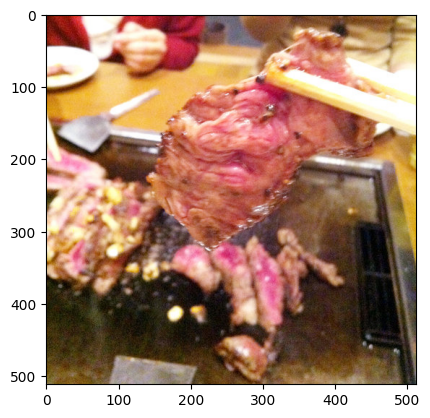

In [ ]:
img = select_random_images(image_path_list)

In [ ]:
def transforme_image_to_tensor():

  ## tranforming the data to a torch tensor object
  data_transform = Tr.Compose([Tr.Resize(size=(224, 224)),
                              Tr.RandomHorizontalFlip(p= 0.5) ,
                               Tr.ToTensor(),
                               ])
  ## try the tranform on the image

  return data_transform

In [ ]:
def try_the_tranform(image_path_list):
  rand_img = select_random_images(image_path_list)

  tranform = transforme_image_to_tensor()

  print(tranform(rand_img).shape)
  print(tranform(rand_img))

the random Path image is : data/pizza_steak_sushi/train/pizza/1660415.jpg
pizza
the image height is : 512, and the width 442
torch.Size([3, 224, 224])
tensor([[[0.7882, 0.8000, 0.8000,  ..., 0.7255, 0.7176, 0.6471],
         [0.8196, 0.8275, 0.8314,  ..., 0.7294, 0.7333, 0.6745],
         [0.8157, 0.8118, 0.8196,  ..., 0.7451, 0.7529, 0.7020],
         ...,
         [0.7725, 0.7843, 0.7804,  ..., 0.7686, 0.7686, 0.6902],
         [0.7725, 0.7804, 0.7765,  ..., 0.7529, 0.7529, 0.6745],
         [0.6510, 0.6549, 0.6549,  ..., 0.6314, 0.6392, 0.5725]],

        [[0.7647, 0.7765, 0.7725,  ..., 0.7333, 0.7216, 0.6471],
         [0.8196, 0.8275, 0.8353,  ..., 0.7373, 0.7373, 0.6745],
         [0.8314, 0.8353, 0.8431,  ..., 0.7569, 0.7647, 0.7059],
         ...,
         [0.7922, 0.8039, 0.8000,  ..., 0.7882, 0.7882, 0.7059],
         [0.7922, 0.8000, 0.7961,  ..., 0.7765, 0.7725, 0.6980],
         [0.6706, 0.6745, 0.6745,  ..., 0.6549, 0.6627, 0.5961]],

        [[0.7569, 0.7647, 0.7725,  ..

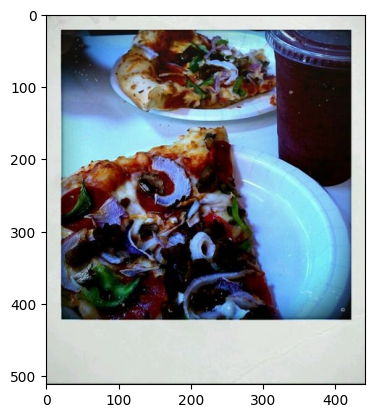

In [ ]:
try_the_tranform(image_path_list)

In [ ]:
def transform_all_image_to_tensor(train_dir, test_dir):

  """ Call the transform """

  data_transform = transforme_image_to_tensor()

  ## we gonna convert all the image to a tensor object with ImageFolder

  train_data = ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
  test_data = ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

  """ Print the Data """
  print(f" The Train data after Transform is : {train_data}")
  print(f" The Test data after Transform is : {test_data}")

  """ Get the Labels """

  class_names = train_data.classes
  class_dict = train_data.class_to_idx
  print(f" the class names is : {class_names}\n and the index corresponding {class_dict}")

  return train_data, test_data

In [ ]:
train_data, test_data = transform_all_image_to_tensor(train_dir, test_dir)

 The Train data after Transform is : Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 The Test data after Transform is : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 the class names is : ['pizza', 'steak', 'sushi']
 and the index corresponding {'pizza': 0, 'steak': 1, 'sushi': 2}


In [ ]:
def explore_some_samples(train_data, test_data):
  first_sample_train = train_data.samples[0]
  print(f"the first image in the train set {first_sample_train}")

  first_img , first_label = train_data[0][0], train_data[0][1]
  class_names = train_data.classes
  print(f" The original image shape is: {first_img.shape} --> [color channel, height , width]")

  first_img = first_img.permute(1, 2, 0) ## Converte alwayse (1, 2, 0) --> like that the image is not on transpose
  """ Check if everthiong work -- > shape data types and label corresponding  """



  print(f" the shape for the image after Rearrange is : {first_img.shape} --> [ height , width, color channel] \n the dataType {type(first_img)} \n the label is:{first_label} ")
  plt.imshow(first_img)
  plt.axis("off")
  plt.title(class_names[first_label])


the first image in the train set ('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)
 The original image shape is: torch.Size([3, 224, 224]) --> [color channel, height , width]
 the shape for the image after Rearrange is : torch.Size([224, 224, 3]) --> [ height , width, color channel] 
 the dataType <class 'torch.Tensor'> 
 the label is:0 


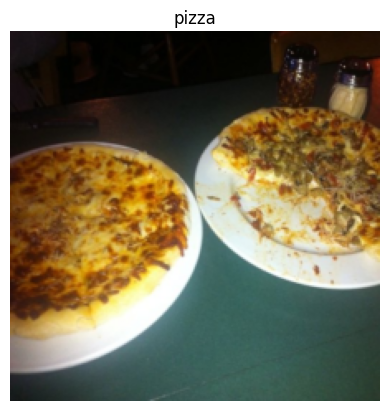

In [ ]:
explore_some_samples(train_data, test_data)

In [ ]:
## oki let's check if we can get the GPU

!nvidia-smi
print(f"the number of CPU {os.cpu_count()}")

/bin/bash: line 1: nvidia-smi: command not found
the number of CPU 2


In [ ]:
def data_loader_convert(train_data, test_data, workers):

  ## after that  to put it in Dataloader object
  batchsize = 32
  train_loader = DataLoader(train_data, batch_size = batchsize, num_workers = workers ,shuffle=True, drop_last=True)
  test_loader = DataLoader(test_data, batch_size = batchsize, num_workers = workers ,shuffle=False)
  print(f"the lenght of the all data train {len(train_data)} and devide by the batch size {len(train_data) / batchsize} ")
  print(f"The lenght of the train Loader {len(train_loader)}")
  print(f"The lenght of the Test Loader {len(test_loader)}")

  return train_loader, test_loader


In [ ]:
train_loader, test_loader  = data_loader_convert(train_data, test_data, workers = 0)

the lenght of the all data train 225 and devide by the batch size 7.03125 
The lenght of the train Loader 7
The lenght of the Test Loader 3


In [ ]:
def interation_on_dataloader(train_loader, test_loader):
  X, y = next(iter(train_loader))
  print(f"the image shape is {X.shape}, and the Label is {y.shape}")

In [ ]:
interation_on_dataloader(train_loader, test_loader)

the image shape is torch.Size([32, 3, 224, 224]), and the Label is torch.Size([32])


# How to replicate the functionalty of ImageFolder
- for your won Dataset

In [ ]:
## importation the Libs

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

from typing import Tuple, Dict, List

In [ ]:
## We go to repliacte the functionalty of ImageFolder

def creating_helper_function():

  """ Let's start with a exemple """
  train_dir = image_path / "train"
  target_dir = train_dir

  class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])

  print(f" the Classes we found is: {class_names_found}")
  return target_dir

In [ ]:
target_dir = creating_helper_function()

 the Classes we found is: ['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory : str) -> Tuple[List[str], Dict[str, int]]:
  """ finds the class folder names in a target directorty """

  # Get the class names by scaning the target Dir
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f" Couldn't find any classes in {directory}")

  ## if that's pass create the index dict

  class_to_inx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_inx

In [ ]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
## oki let's create our ImageFolderCostum

class ImageFolderCostom(Dataset):

  ## def init
  def __init__(self, targ_dir : str, transform=None):

    ## create class atribute
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # --> */*.jpg = (into the folder , for all categorie , take all pic)
    self.transform = transform


    ## create the calsses and the idx classes

    self.classes, self.classes_to_idx =  find_classes(targ_dir)

    ## create the function to load the Images

  def load_image(self, index : int) -> Image.Image:
      " Open an image and retun it "

      image_path  = self.paths[index]
      return Image.open(image_path)

  def __len__(self) -> int:
    return(len(self.paths))

  " To return a particular sample"
  def __getitem__(self, index : int) -> Tuple[torch.Tensor, int]:

    "Return oe samnple of data , like (X, y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name ## exepecting to return format: data_folder/ cat_flder/ img.jpg
    class_idx = self.classes_to_idx[class_name]

    ## Apply Transform if you need

    if self.transform:
      return self.transform(img) , class_idx # that's to return after transform (image , label) --> (X, y)
    else:
      return img, class_idx



In [ ]:
def create_transformer():

  train_transform = Tr.Compose([Tr.Resize(size=(224, 224)),
                                Tr.RandomHorizontalFlip(p= 0.5),
                                Tr.ToTensor()])

  test_transform = Tr.Compose([Tr.Resize(size=(224, 224)),
                                Tr.ToTensor()])
  return train_transform, test_transform

In [ ]:
# Now Time to Test the ImageFolderCustom
def create_data_custom(train_dir, test_dir):
  train_Tr, test_Tr = create_transformer()

  train_data_custom = ImageFolderCostom(targ_dir=train_dir, transform=train_Tr)
  test_data_custom =  ImageFolderCostom(targ_dir=test_dir, transform=test_Tr)

  print(f"the Train custom Data is : {train_data_custom}")
  print(f"the Test custom Data is : {test_data_custom}")

  return train_data_custom, test_data_custom

In [ ]:
train_data_custom, test_data_custom  = create_data_custom(train_dir, test_dir)

the Train custom Data is : <__main__.ImageFolderCostom object at 0x79592cd4ce20>
the Test custom Data is : <__main__.ImageFolderCostom object at 0x79592cd4ec20>


In [ ]:
def test_the_custom_data(train_data_custom, test_data_custom):

  print(f"the lenght of the Train data costum is: {len(train_data_custom)}")
  print(f"the lenght of the Test data costum is: {len(test_data_custom)}")

  ## and check if the attribute works

  print(f"The classes is : {train_data_custom.classes}, the Index classes is: {train_data_custom.classes_to_idx}")

In [ ]:
test_the_custom_data(train_data_custom, test_data_custom)

the lenght of the Train data costum is: 225
the lenght of the Test data costum is: 75
The classes is : ['pizza', 'steak', 'sushi'], the Index classes is: {'pizza': 0, 'steak': 1, 'sushi': 2}


# Let's Visualisation

In [ ]:
def plot_some_image(dataset : Dataset ,classes : List[str] = None,
                    n = 10,display_shape : bool = True,
                    seed : int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"We fix the number of ploting is 10")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k = n)

  plt.figure(figsize=(20, 10))

  for i, targ_sample in enumerate(random_samples_idx):

    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_img = targ_img.permute(1, 2, 0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_img)
    plt.axis("off")

    if classes:
      title = f"Classe: {classes[targ_label]}" ## get the classes given a label (int)
      if display_shape :
        title = title + f"\nshape: {targ_img.shape}"

    plt.title(title)





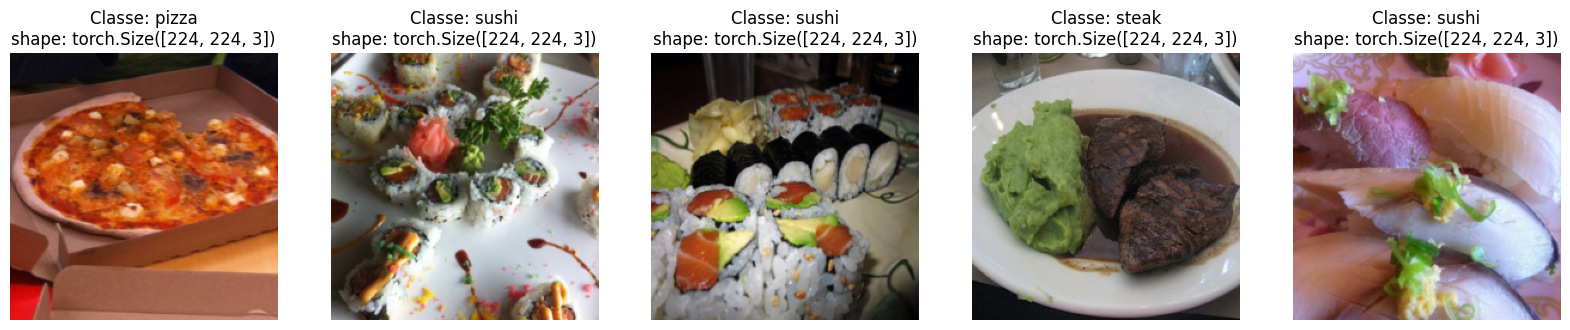

In [ ]:
plot_some_image(train_data, n = 5 , classes= train_data.classes, seed = None )

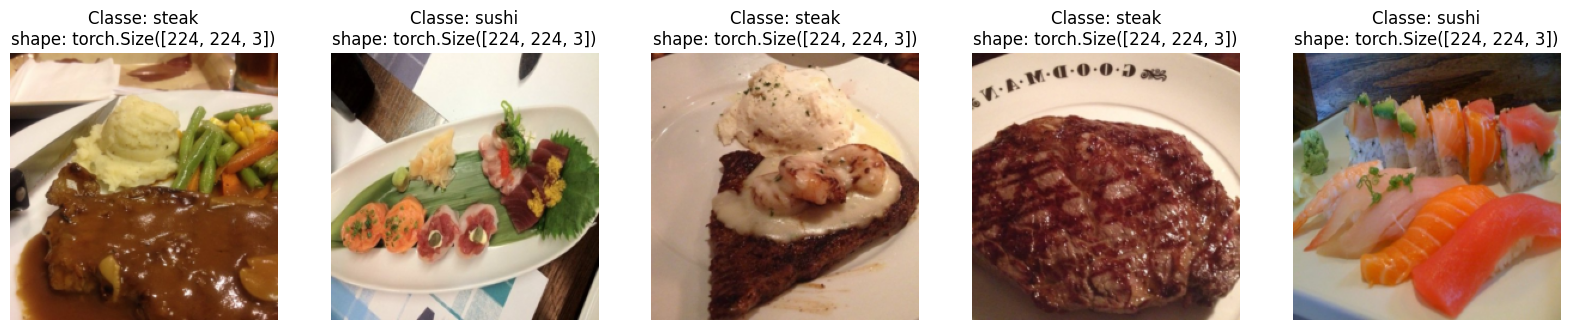

In [ ]:
plot_some_image(train_data_custom, n = 5 , classes= train_data_custom.classes, seed = None )

In [ ]:
train_loader_costum, test_loader_costum  = data_loader_convert(train_data_custom, test_data_custom, workers = 0)

the lenght of the all data train 225 and devide by the batch size 7.03125 
The lenght of the train Loader 7
The lenght of the Test Loader 3


In [ ]:
def interation_on_dataloader_costum(train_loader_costum, test_loader_costum):
  X, y = next(iter(train_loader_costum))
  print(f" The Shape is for the image: {X.shape}, and the label is {y.shape}")

In [ ]:
interation_on_dataloader_costum(train_loader_costum, test_loader_costum)

 The Shape is for the image: torch.Size([32, 3, 224, 224]), and the label is torch.Size([32])


# Try to make a data augmentation

In [ ]:
def new_transform():
  train_transform_aug = Tr.Compose([Tr.Resize(size=(224, 224)),
                                Tr.RandomHorizontalFlip(p= 0.5),
                                Tr.TrivialAugmentWide(num_magnitude_bins=31),
                                Tr.ToTensor()])

  test_transform_aug = Tr.Compose([Tr.Resize(size=(224, 224)),
                                Tr.ToTensor()])

  return train_transform_aug, test_transform_aug

In [ ]:
def apply_new_transform():
  image_path_list = list(image_path.glob("*/*/*.jpg"))
  "Take the 10 first ellement "
  print(f"the first ten image is: {image_path_list[:10]}")
  return image_path_list

In [ ]:
image_path_list = apply_new_transform()

the first ten image is: [PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg')]


# Oki it's Time to build the model

- Model 0 : let's try TinyVGG Arichecture
- step 1 : create a Transform like in TinyVGG
- step 2 : load and transform the Data with ImageFolder give a Paht Dir
- step 3 : converte to a Dataloaders
- step 4 : Builde de Model Classes
- step 5 : make a forward pass on a single Batch image to now the shape of X
- step 6 : check the Summary --> torchinfo summary
- step 7 : create a function for the train step
- step 8 : create a function for the test step
- step 9 : create a function for the TRAIN Model with TQDM

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def create_transform():
  simple_train_transform  =  Tr.Compose([Tr.Resize(size=(64, 64)),
                                Tr.ToTensor()])
  return simple_train_transform

In [ ]:
simple_train_transform = create_transform()

In [ ]:
def load_and_transform_data(train_dir, test_dir, train_transform , test_tranform):

  simple_train_data =  ImageFolder(root=train_dir, transform=train_transform, target_transform=None)
  simple_test_data = ImageFolder(root=test_dir, transform=test_tranform, target_transform=None)

  """ Print the Data """

  print(f" The Train data after Transform is : {simple_train_data}")
  print(f" The Test data after Transform is : {simple_test_data}")

  """ Get the Labels """


  class_name = simple_train_data.classes
  print(class_name)

  return simple_train_data, simple_test_data, class_name


In [ ]:
simple_train_data, simple_test_data, class_name = load_and_transform_data(train_dir, test_dir, simple_train_transform, simple_train_transform)

 The Train data after Transform is : Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
 The Test data after Transform is : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
['pizza', 'steak', 'sushi']


In [ ]:
def data_loader_convert_VGG(train_data, test_data):
  ## set the Constant Num of Workers and BatchSize

  BATCH_SIZE = 32
  NUM_WORKES = os.cpu_count()

  train_dataloader_simple = DataLoader(dataset= simple_train_data, batch_size=BATCH_SIZE, num_workers=NUM_WORKES, shuffle=True, drop_last=True)
  test_dataloader_simple = DataLoader(dataset= simple_test_data, batch_size=BATCH_SIZE, num_workers=NUM_WORKES, shuffle=False)

  "checke if that's Work "
  X, y = next(iter(train_dataloader_simple))
  print(f"the shape of the image in train Loader is {X.shape}")
  print(f"the shape of the label in train loader is {y.shape}")

  return train_dataloader_simple, test_dataloader_simple



In [ ]:
train_dataloader_simple, test_dataloader_simple = data_loader_convert_VGG(simple_train_data, simple_test_data)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


the shape of the image in train Loader is torch.Size([32, 3, 64, 64])
the shape of the label in train loader is torch.Size([32])


In [ ]:
class TinyVGG(nn.Module):

  " Model 0 gonna replicate exactly the same architecture like te VGG Tyni model from CNN explainer"

  def __init__(self, input_shape : int, hidden_units : int ,output_shape : int) -> None :
    super().__init__()

    ## Block one

    self.conv1_layer = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2) ## the default stride in MaxPoolsd = Kernel Size
    )

    self.conv2_layer = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2) ## the default stride in MaxPoolsd = Kernel Size
    )

    " oki that's the toww block now the classifier "

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units *13 *13, out_features= output_shape)
    )

  def forward(self, x):

    x = self.conv1_layer(x)
    # print(f"the Shape of x after the first Cov block is {x.shape}")

    x = self.conv2_layer(x)
    # print(f"the Shape of x after the Second Cov block is {x.shape}")

    x = self.classifier(x)

    # print(f"the Shape of x after the classifier block is {x.shape}")

    return x


In [ ]:
def initialize_model():

    ModelVGG = TinyVGG(input_shape = 3, ## number of channel on your images
                          hidden_units = 10,
                          output_shape = len(class_name)).to(device)
    loss_function = nn.CrossEntropyLoss() ## Multi Classification task
    learning_rate = (10 ** -3)
    optimizer = Adam(ModelVGG.parameters(), lr=learning_rate)

    print(ModelVGG)



    return ModelVGG, loss_function, optimizer

In [ ]:
ModelVGG, loss_function, optimizer = initialize_model()

TinyVGG(
  (conv1_layer): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_layer): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)


In [ ]:
def check_forward_pass(train_dataloader_simple, test_dataloader_simple, ModelVGG):
  X, y = next(iter(train_dataloader_simple))
  X, y = X.to(device), y.to(device)

  print(summary(ModelVGG,  input_size = [1, 3, 64, 64]))



In [ ]:
check_forward_pass(train_dataloader_simple, test_dataloader_simple, ModelVGG)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def test_model(train_dataloader_simple, test_dataloader_simple, ModelVGG, loss_function):
  X, y = next(iter(train_dataloader_simple))
  X, y = X.to(device), y.to(device)

  yHat = ModelVGG(X)
  loss = loss_function(yHat, y)
  print(y)
  print(yHat)


In [ ]:
test_model(train_dataloader_simple, test_dataloader_simple, ModelVGG, loss_function)

tensor([2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1,
        0, 0, 2, 0, 0, 2, 0, 2])
tensor([[ 8.6569e-03,  1.8669e-02, -3.5977e-02],
        [ 6.1311e-03,  1.5936e-02, -3.0572e-02],
        [ 4.0161e-03,  2.4111e-02, -3.2217e-02],
        [ 3.3811e-03,  1.7893e-02, -3.5376e-02],
        [ 3.1015e-03,  2.1538e-02, -3.2934e-02],
        [ 4.2722e-03,  1.9045e-02, -3.9318e-02],
        [ 3.1087e-04,  2.2800e-02, -4.2078e-02],
        [-9.6016e-05,  2.0222e-02, -3.7959e-02],
        [ 3.9381e-03,  2.3605e-02, -3.1887e-02],
        [ 4.0141e-03,  1.3325e-02, -3.1551e-02],
        [ 3.5946e-03,  1.9013e-02, -3.7156e-02],
        [ 6.2303e-04,  1.9863e-02, -3.5859e-02],
        [ 6.1603e-03,  1.9010e-02, -4.0878e-02],
        [ 4.5662e-03,  1.9896e-02, -3.6705e-02],
        [ 3.5024e-03,  2.1273e-02, -3.3276e-02],
        [ 1.8581e-03,  1.6001e-02, -3.3694e-02],
        [ 4.0298e-03,  1.9354e-02, -3.9538e-02],
        [ 3.9361e-03,  1.8796e-02, -3.9294e-02],
     

In [ ]:
from typing import Tuple
def train_step(Model: nn.Module , loss_function : nn.Module, optimizer : torch.optim.Optimizer , dataloader : DataLoader, device: torch.device) -> Tuple[float, float]:

  Model.train()
  train_loss , train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)

    ## Forward Pass
    yHat = Model(X)

    ## calculate the loss

    loss = loss_function(yHat, y)
    train_loss += loss.item()

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## loss Backward
    loss.backward()

    ## Optimizer Step
    optimizer.step()

    ## calculate the accuracy
    yHat_class = torch.argmax(torch.softmax(yHat, dim=1), dim=1)
    train_acc += (yHat_class == y).sum().item()/len(yHat)

  train_loss = train_loss / len(dataloader) ## devide the total by the number of batch
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [ ]:
def test_step(Model: nn.Module , loss_function : nn.Module, dataloader : DataLoader, device: torch.device) -> Tuple[float, float]:

  Model.eval()
  test_loss , test_acc = 0, 0

  with torch.inference_mode():

    for batch, (X, y) in enumerate(dataloader):
      X_test, y_test = X.to(device), y.to(device)

      ## forward pass
      yHat_test = Model(X_test) ## give the logics

      ## calculate the Loss
      loss = loss_function(yHat_test, y_test)
      test_loss += loss.item()

      ## calculate the accuracy
      yHat_test_class = torch.argmax(yHat_test, dim=1)
      test_acc += ((yHat_test_class == y_test).sum().item()/len(yHat_test))

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


# Train function combine train step , test step

In [ ]:
def train_model(Model : nn.Module , loss_function : nn.Module, optimizer : torch.optim.Optimizer ,
                train_dataloader : DataLoader, test_dataloader : DataLoader, numbers_epochs : int, device: torch.device) -> Dict[str, List[float]]:

  ## Create a empty Dict to tracking the result

  results = {"train_loss" : [],
            "train_acc" : [],
            "test_loss" : [],
            "test_acc" : []}

  for epochi in tqdm(range(numbers_epochs)):

    train_loss , train_acc = train_step(Model = Model , loss_function =  loss_function,
                                        optimizer = optimizer , dataloader =  train_dataloader, device = device)

    test_loss, test_acc = test_step(Model = Model , loss_function =  loss_function,
                                    dataloader =  test_dataloader, device = device)

    print(f"Epochi : {epochi + 1} | Train loss : {train_loss:.4f} | Train acc : {train_acc:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f}")

    ## finaly update the result Dict
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results


In [ ]:
ModelVGG_0, loss_function, optimizer = initialize_model()
results_0 = train_model(Model = ModelVGG_0 , loss_function = loss_function, optimizer = optimizer ,
                      train_dataloader = train_dataloader_simple, test_dataloader = test_dataloader_simple , numbers_epochs = 20, device = device)

TinyVGG(
  (conv1_layer): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_layer): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epochi : 1 | Train loss : 1.1126 | Train acc : 0.3125 | Test loss : 1.0936 | Test acc : 0.2604
Epochi : 2 | Train loss : 1.0982 | Train acc : 0.3259 | Test loss : 1.1130 | Test acc : 0.2083
Epochi : 3 | Train loss : 1.0910 | Train acc : 0.3482 | Test loss : 1.0932 | Test acc : 0.3021
Epochi : 4 | Train loss : 1.0746 | Train acc : 0.5045 | Test loss : 1.0957 | Test acc : 0.3333
Epochi : 5 | Train loss : 1.0409 | Train acc : 0.4777 | Test loss : 1.0411 | Test acc : 0.4735
Epochi : 6 | Train loss : 0.9893 | Train acc : 0.5580 | Test loss : 1.0386 | Test acc : 0.3333
Epochi : 7 | Train loss : 0.9097 | Train acc : 0.5670 | Test loss : 0.9751 | Test acc : 0.5047
Epochi : 8 | Train loss : 0.8852 | Train acc : 0.5893 | Test loss : 0.9943 | Test acc : 0.3930
Epochi : 9 | Train loss : 0.8713 | Train acc : 0.5625 | Test loss : 0.9539 | Test acc : 0.4735
Epochi : 10 | Train loss : 0.8414 | Train acc : 0.6071 | Test loss : 1.0271 | Test acc : 0.4233
Epochi : 11 | Train loss : 0.8192 | Train acc : 0

In [ ]:
def plot_result(results: Dict[str, List[float]]):

  name = "Tiny VGG Model"

  train_loss = results["train_loss"]
  test_loss = results["test_loss"]

  train_acc = results["train_acc"]
  test_acc = results["test_acc"]

  fig, ax = plt.subplots(1, 2, figsize=(13, 4))

  ax[0].plot(train_loss, 's-', label='Train loss')
  ax[0].plot(test_loss, 'o-', label='Test loss')
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('epoch')
  ax[0].set_title('Losses '+ name)
  ax[0].legend()

  ax[1].plot(train_acc, 's-', label='Train, Error')
  ax[1].plot(test_acc, 'o-', label='Test Error, ')
  ax[1].set_ylabel('Accuracy rate (%)')
  ax[1].set_xlabel('Epoch')
  ax[1].set_title('Accuracy')
  ax[1].set_title(f'Final model test Accuracy: {100 * test_acc[-1]:.2f}% ' + name)
  ax[1].legend()
  plt.show()




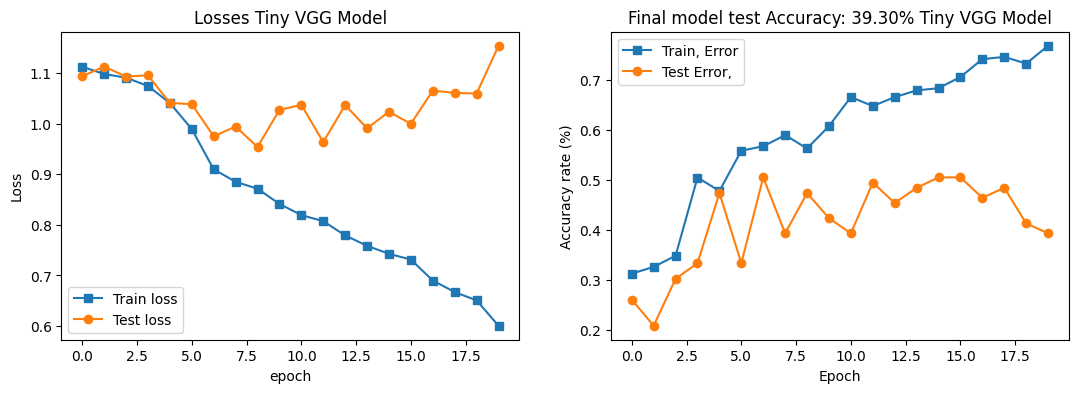

In [ ]:
plot_result(results = results_0)

# Oki we have Bad result
We gonna try to Boost the Model

- step 1 : try to apply a data augmentation


In [ ]:
# let's create a transforme with data augmentation

def create_transform_augmentation():
  train_transform_aug = Tr.Compose([Tr.Resize(size=(64, 64)),
                                Tr.TrivialAugmentWide(num_magnitude_bins=31),
                                Tr.ToTensor()])

  test_transform_aug = Tr.Compose([Tr.Resize(size=(64, 64)),
                                Tr.ToTensor()])

  return train_transform_aug, test_transform_aug

In [ ]:
train_transform_aug, test_transform_aug = create_transform_augmentation()

In [ ]:
train_data_aug, test_data_aug, class_name_aug =  load_and_transform_data(train_dir, test_dir, train_transform_aug , test_transform_aug)
train_dataloader_aug, test_dataloader_aug = data_loader_convert_VGG(train_data_aug, test_data_aug)

 The Train data after Transform is : Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
 The Test data after Transform is : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
['pizza', 'steak', 'sushi']
the shape of the image in train Loader is torch.Size([32, 3, 64, 64])
the shape of the label in train loader is torch.Size([32])


In [ ]:
def initialize_model_1():

    ModelVGG_1 = TinyVGG(input_shape = 3, ## number of channel on your images
                          hidden_units = 10,
                          output_shape = len(class_name_aug)).to(device)
    loss_function = nn.CrossEntropyLoss() ## Multi Classification task
    learning_rate = (10 ** -3)
    optimizer = Adam(ModelVGG.parameters(), lr=learning_rate)
    print(ModelVGG)



    return ModelVGG_1, loss_function, optimizer

TinyVGG(
  (conv1_layer): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_layer): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epochi : 1 | Train loss : 1.1116 | Train acc : 0.3304 | Test loss : 1.1195 | Test acc : 0.1979
Epochi : 2 | Train loss : 1.0989 | Train acc : 0.3571 | Test loss : 1.0950 | Test acc : 0.2604
Epochi : 3 | Train loss : 1.0963 | Train acc : 0.3482 | Test loss : 1.0846 | Test acc : 0.2604
Epochi : 4 | Train loss : 1.0861 | Train acc : 0.3661 | Test loss : 1.0822 | Test acc : 0.3021
Epochi : 5 | Train loss : 1.0635 | Train acc : 0.4688 | Test loss : 1.0623 | Test acc : 0.3125
Epochi : 6 | Train loss : 1.0172 | Train acc : 0.4509 | Test loss : 0.9919 | Test acc : 0.5256
Epochi : 7 | Train loss : 0.9350 | Train acc : 0.5357 | Test loss : 1.0772 | Test acc : 0.4053
Epochi : 8 | Train loss : 0.9055 | Train acc : 0.5982 | Test loss : 0.9850 | Test acc : 0.4034
Epochi : 9 | Train loss : 0.8753 | Train acc : 0.6473 | Test loss : 0.9898 | Test acc : 0.4129
Epochi : 10 | Train loss : 0.8379 | Train acc : 0.6295 | Test loss : 0.9617 | Test acc : 0.5047
Epochi : 11 | Train loss : 0.8170 | Train acc : 0

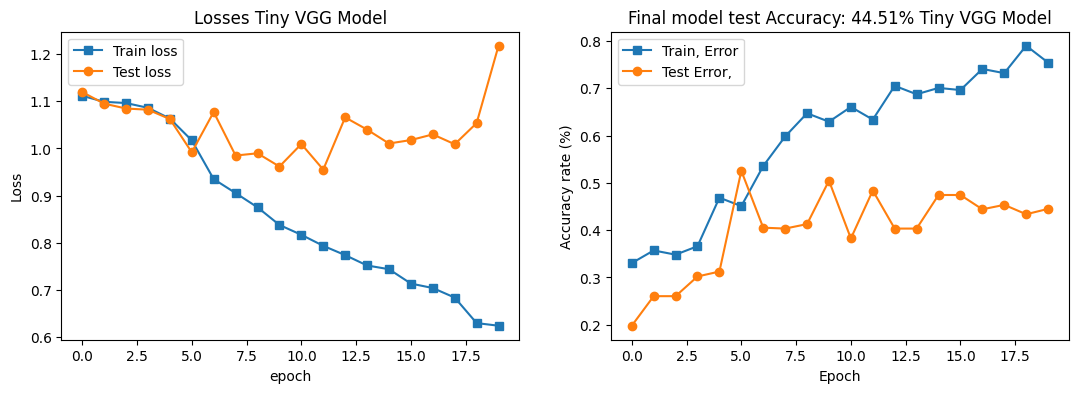

In [ ]:
ModelVGG_1, loss_function, optimizer = initialize_model_1()
results_1 = train_model(Model = ModelVGG , loss_function = loss_function, optimizer = optimizer ,
                      train_dataloader = train_dataloader_aug, test_dataloader = test_dataloader_aug , numbers_epochs = 20, device = device)
plot_result(results = results_1)

# That's Not look like the probleme coming from the Data Set


- step 1 : Compare on a DataFrame the resulte on the 2 Models

In [ ]:
def put_ont_dataframe(results_0, results_1):

  df_0 = pd.DataFrame(results_0)
  df_1 = pd.DataFrame(results_1)

  fig, ax = plt.subplots(2, 2, figsize=(15, 10))

  ax[0][0].plot(results_0['train_loss'], 's-', label='Train loss Model 0')
  ax[0][0].plot(results_1['train_loss'], 's-', label='Train loss Model 1')
  ax[0][0].set_title("Train Loss")
  ax[0][0].set_xlabel('Epoch')
  ax[0][0].legend()

  ax[0][1].plot(results_0['test_loss'], 's-', label='Test loss Model 0')
  ax[0][1].plot(results_1['test_loss'], 's-', label='Test loss Model 1')
  ax[0][1].set_title("Test Loss")
  ax[0][1].set_xlabel('Epoch')
  ax[0][1].legend()


  ax[1][0].plot(results_0['train_acc'], 's-', label='Train Acc Model 0')
  ax[1][0].plot(results_1['train_acc'], 's-', label='Train Acc Model 1')
  ax[1][0].set_title("Train Acc")
  ax[1][0].set_xlabel('Epoch')
  ax[1][0].legend()

  ax[1][1].plot(results_0['test_acc'], 's-', label='Test loss Model 0')
  ax[1][1].plot(results_1['test_acc'], 's-', label='Test loss Model 1')
  ax[1][1].set_title("Test Acc")
  ax[1][1].set_xlabel('Epoch')
  ax[1][1].legend()

  plt.show()




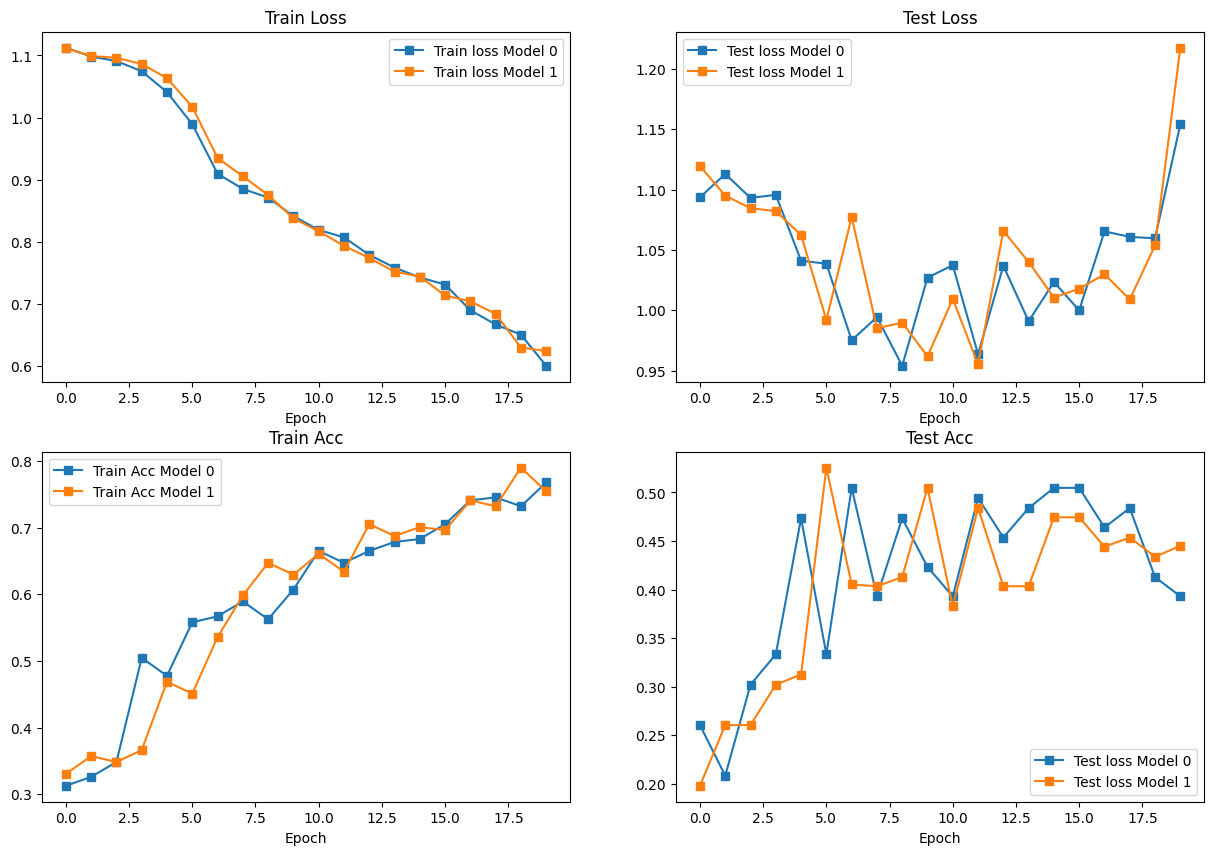

In [ ]:
put_ont_dataframe(results_0, results_1)

# Let's try to make a prediction from a Picture the model never seen before

step 1 : download a picture from the internet

step 2 : Be sure the image have the same format like the model know to take

step 3 : use read image torchvision.io.read_image(str(the path image)).float()

step 4 : create a transform to Resize the image on the same size like you model as training  

step 5 : Make the prediction

In [ ]:
## let's download a costum image

def dowload_costum_image():
  custom_image_path = data_path / "04-pizza-dad.jpeg"

  if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:

      ## when downloading fromg Git --> use Raw
      request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
      print(f"Downloading {custom_image_path}")

      f.write(request.content)
  else:
    print(f"the image it's alerady Exist")

  return custom_image_path


In [ ]:
custom_image_path = dowload_costum_image()

In [ ]:
def transform_custume_image():
  ## the torchvision.io.read_image --> get a path on string format

  costum_image_float = torchvision.io.read_image(str(custom_image_path)).float()
  # print(f"the Tensor for the image is : {costum_image_float}\n and the Datatype {type(costum_image_float)}\n the shape is {costum_image_float.shape}")

  ## Normalized the data
  costum_image_float /= torch.max(costum_image_float)
  # print(f"the Tensor for the image is :\n {costum_image_float}")

  costum_transform_img = Tr.Compose([Tr.Resize(size=(64, 64))])

  costum_image_tranformed = costum_transform_img(costum_image_float)


  ## check the image --> swap the dimention
  costum_image_float = costum_image_float.permute(1, 2, 0)

  # plot the image
  # plt.imshow(costum_image_float)

  return costum_image_tranformed



In [ ]:
def make_prediction(Model):
  image_to_pred = transform_custume_image()
  plt.imshow(image_to_pred.permute(1, 2, 0))
  print(image_to_pred)
  print(f"the shape from the image to pred is: {image_to_pred.shape}")

  ## the model workj on a device so push in to device
  ## and we need a extra dimention for the batch size  dimmension so Unsqueeze
  image_to_pred = image_to_pred.unsqueeze(0)
  image_to_pred = image_to_pred.to(device)

  Model.eval()
  with torch.inference_mode():
    custom_imag_pred = Model(image_to_pred)

  ## get the prediction logics

  print(f"the logigcs is : {custom_imag_pred}")
  "And Now convert logics --> to the probabilities"
  custom_imag_pred_prob = torch.softmax(custom_imag_pred, dim=1)

  print(f"the propability is : {custom_imag_pred_prob}")
  "finnaly convert the probabilities -- >Label prob "
  custom_imag_pred_label =  torch.argmax(custom_imag_pred_prob, dim=1)

  ## and check on the classe name what's the name of the categorie corresponding oon this value label

  print(f"the name of the categorie corresponding on the label predicted\n {custom_imag_pred_label} \n is a: {class_name[custom_imag_pred_label]}")



tensor([[[0.4673, 0.5292, 0.5601,  ..., 0.0976, 0.0604, 0.0578],
         [0.4014, 0.4351, 0.4291,  ..., 0.0671, 0.0714, 0.0848],
         [0.5172, 0.4849, 0.4472,  ..., 0.0613, 0.0605, 0.0694],
         ...,
         [0.2999, 0.2819, 0.2705,  ..., 0.4570, 0.4019, 0.3955],
         [0.2767, 0.2697, 0.2606,  ..., 0.4620, 0.4208, 0.3763],
         [0.2502, 0.2557, 0.2690,  ..., 0.4894, 0.6088, 0.5344]],

        [[0.4926, 0.5517, 0.5773,  ..., 0.1246, 0.0688, 0.0680],
         [0.4545, 0.4876, 0.4600,  ..., 0.0806, 0.0824, 0.1022],
         [0.5485, 0.5217, 0.4785,  ..., 0.0689, 0.0704, 0.0882],
         ...,
         [0.2066, 0.1971, 0.1882,  ..., 0.3125, 0.2772, 0.2778],
         [0.1922, 0.1870, 0.1805,  ..., 0.3217, 0.2926, 0.2662],
         [0.1730, 0.1777, 0.1865,  ..., 0.3425, 0.4223, 0.3684]],

        [[0.4510, 0.5250, 0.5622,  ..., 0.0806, 0.0408, 0.0439],
         [0.3132, 0.3614, 0.3848,  ..., 0.0508, 0.0532, 0.0766],
         [0.4766, 0.4248, 0.3951,  ..., 0.0463, 0.0469, 0.

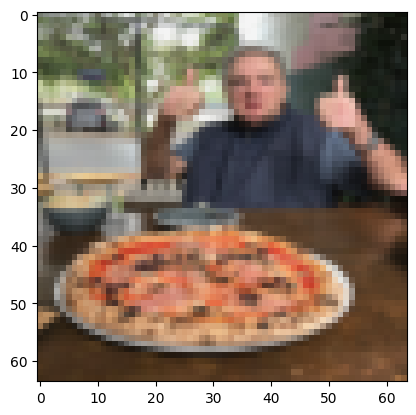

In [ ]:
make_prediction(ModelVGG_0)

In [ ]:
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)